In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [25]:
dataset = pd.read_csv('C:/Users/Administrator/Downloads/Python_files_material/Excelr assignments/Simple Linear Regression/delivery_time.csv')
dataset.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [26]:
dataset = dataset.rename(columns = {'Delivery Time':'dt','Sorting Time':'st'})

In [27]:
dataset.head()

,dt,st
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [28]:
x = dataset.iloc[:,0].values
y = dataset.iloc[:,1].values

In [29]:
dataset.corr()

,dt,st
dt,1.000000,0.825997
st,0.825997,1.000000


Text(0, 0.5, 'Delivery time')

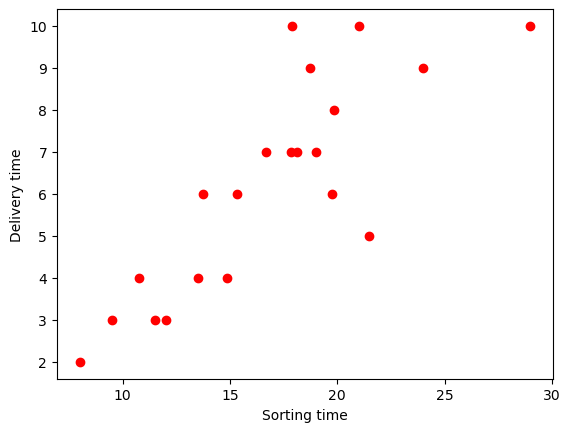

In [30]:
plt.scatter(x = dataset.dt,y = dataset.st, color = 'RED')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

{'whiskers': [<matplotlib.lines.Line2D at 0x2b447454b80>,
 'caps': [<matplotlib.lines.Line2D at 0x2b4472f3160>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b4474548b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b4472f3700>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b4472f39d0>],
 'means': []}

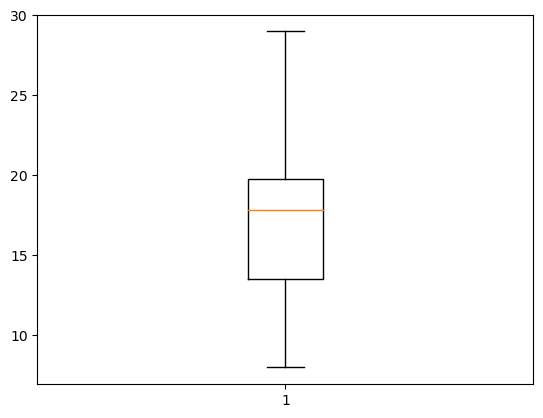

In [31]:
plt.boxplot(dataset.dt)

(array([3., 5., 5., 6., 1., 1.]),
 array([ 8. , 11.5, 15. , 18.5, 22. , 25.5, 29. ]),
 <BarContainer object of 6 artists>)

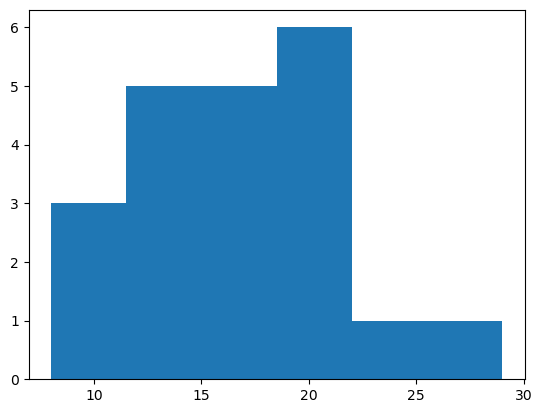

In [32]:
plt.hist(dataset.dt, bins=6)

In [37]:
model2=smf.ols("dt~st",data=dataset).fit()

In [38]:
model2.params

Intercept    6.582734
st           1.649020
dtype: float64

In [39]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     dt   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        15:38:42   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
st             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
model3=smf.ols("dt~np.log(st)",data=dataset).fit()

In [47]:
model2.conf_int(0.05)

,0,1
Intercept,2.979134,10.186334
st,1.108673,2.189367


In [48]:
model3.conf_int(0.05)

,0,1
Intercept,-3.97778,6.297147
np.log(st),6.16977,11.917057


In [49]:
pred2 = model2.predict(dataset)

In [50]:
pred3 = model3.predict(dataset)

Text(0, 0.5, 'Delivery time')

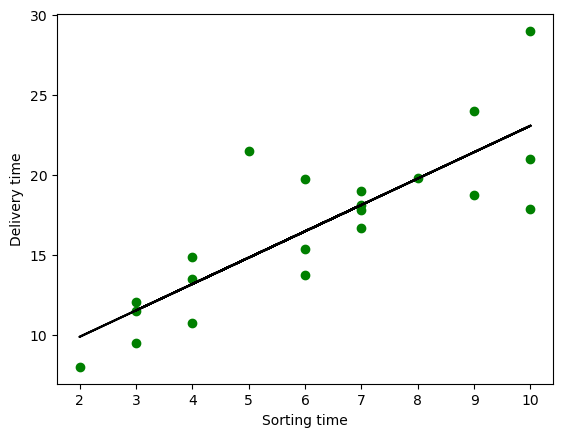

In [51]:
plt.scatter(x=dataset.st, y=dataset.dt, color='green')
plt.plot(dataset.st, pred2,color='black')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

Text(0, 0.5, 'Delivery time')

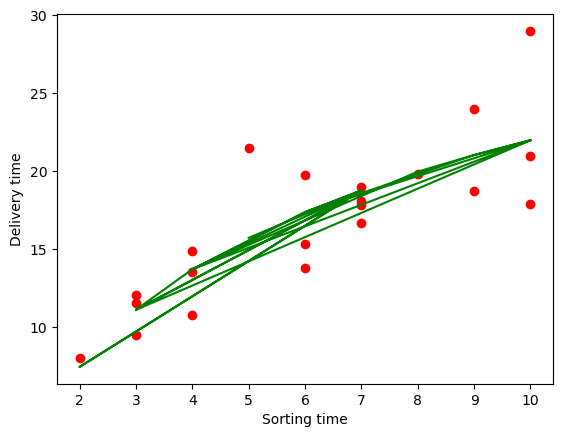

In [52]:
plt.scatter(x=dataset.st, y=dataset.dt, color='red')
plt.plot(dataset.st, pred3,color='green')
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")